# Установка

Для того, чтобы установить программу или обновить ее версию, перейдите в [https://github.com/heinwol/sponge-networks/releases/](https://github.com/heinwol/sponge-networks/releases/) и скачаете (из последней версии) файл с расширением `.whl`, например (старая версия):

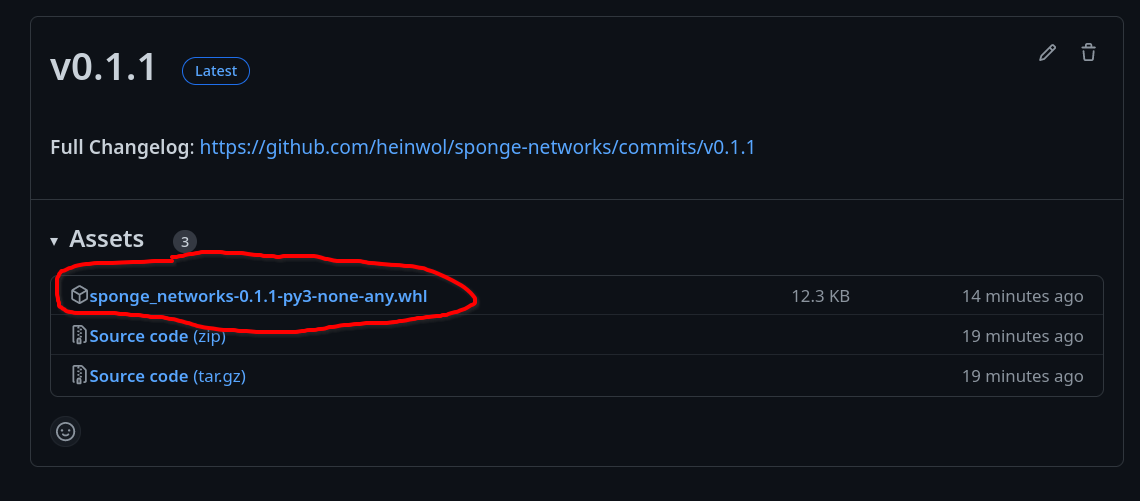

Затем откройте в папке с загрузками git bash и напишите `pip install <имя файла>`, например:

```console
pip install sponge_networks-0.2.2-py3-none-any.whl
```

---

Обновить версию текущего файла (`doc.ipynb`) можно там же (скачать новую версию файла `doc.ipynb`)

Либо же перейдите по [ссылке](https://raw.githubusercontent.com/heinwol/sponge-networks/main/jupyter/doc.ipynb). В браузере откроется сам файл, вам останется только нажать "сохранить как..." в браузере. Это всегда будет самая новая версия документации, в отличие от приложенной в релиз

# Использование

После установки, пакет `sponge_networks` будет доступен по всей системе. Для того, чтобы им воспользоваться, стоит импортировать его:

In [1]:
import sponge_networks as sn

В дальнейшей работе нам, вероятно, понадобятся еще библиотеки, включая `networkx`, их тоже импортируем:

In [2]:
import numpy as np
import networkx as nx
import pandas as pd

Важная подсказка для пользования jupyter lab:
 - если нажать `Tab` во время написания названия какого-либо члена какого-либо объекта, то можно узнать, какие члены вообще есть у этого объекта. Так, если начать писать `np.<TAB>`, то можно узнать про все члены модуля `numpy`, а если писать `np.zer<TAB>`, то можно узнать, какие члены `np` начинаются на `zer`;
 - если нажать `Shift+Tab`, пока курсор находится названии некоторого объекта, то можно узнать дополнительную информацию о нем. Так, можно узнать информацию про модуль `np` или же про функцию из этого модуля `np.zeros`:

In [3]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## Интерфейс `sponge_networks`

На самом деле, в библиотеке есть несколько понятий (классов) ресурсной сети.

- Во-первых, это, собственно, `sn.ResourceNetwork` -- сама модель (произвольной) ресурсной сети, которая используется в качестве основы для всего остального. Ресурсную сеть можно задавать с помощью графа (`networkx.DiGraph`) и проводить с ней произвольные модификации (правда, через несколько нетривиальный программный интерфейс). Конечно же, можно рисовать ресурсную сеть и проводить различные симуляции с различными начальными состояниями. Также есть некоторые дополнительные возможности. Например, можно посчитать предельное состояние при единичном ресурсе в сети ($q_1^{*}$), пороговое значение ресурса ($T$), входящий и исходящий поток.
  - Стоит отметить, что при использовании указанных "дополнительных возможностей" возвращаться будут массивы без указания индексов, что может составлять проблему при работе с сетями, у которых вершины нумеруются не последовательными натуральными числами, а как-то иначе. Например, парами натуральных чисел.

- Во-вторых, реализованы модификации обычной ресурсной сети: `sn.ResourceNetworkGreedy` -- сеть с жадными вершинами, `sn.ResourceNetworkWithIncome` -- сеть с приходящим ресурсом. Интерфейс данных классов абсолютно аналогичен обычной ресурсной сети (`sn.ResourceNetwork`), в них просто переопределено правило распределения ресурса при запуске симуляции. Однако другие методы переопределены не были, поэтому, например, функция для вычисления порогового значения ресурса будет рассматривать ресурсную сеть с жадными вершинами как обычную, поэтому результат будет некорректным

- В-третьих, собственно, сама губковая сеть -- `sn.SpongeNetwork`. Она содержит в себе поле `sn.SpongeNetwork.resource_network`, которое является ресурсной сетью с жадными вершинами. То есть, `sn.SpongeNetwork` -- в некотором смысле "обертка" над ресурсной сетью с жадными вершинами. Кстати, довольно легко сделать так, чтобы это была ресурсная сеть с обычными вершинами или с пребывающим ресурсом. `resource_network` является самодостаточной ресурсной сетью, с которой можно проводить все операции, допускаемые ресурсной сетью. Однако для модификации внутреннего графа стоит воспользоваться специальной функцией (пока не реализовано, но это быстро)

Все недостатки, указанные выше, можно устранить, это не слишком сложно

### Ресурсные сети

Для создания произвольной ресурсной сети можно передать произвольный направленный граф (`nx.DiGraph`) в конструктор `sn.ResourceNetwork`: 

In [4]:
graph = nx.from_numpy_array(np.array([
    [1, 2, 0],
    [3, 0, 0],
    [4, 1, 1]
]), create_using=nx.DiGraph)
nw = sn.ResourceNetwork(graph)
nw

ResourceNetwork(adjacency_matrix=array([[1, 2, 0],
                                        [3, 0, 0],
                                        [4, 1, 1]]),
                idx_descriptor=[0, 1, 2])

Если стандартный способ отображения ресурсной сети не подходит, можно ее нарисовать:

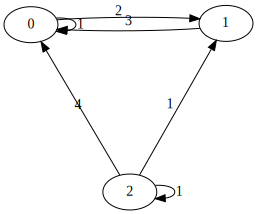

In [5]:
nw.plot(scale=1.3)

Явно выписать матрицу смежности:

In [6]:
nw.adjacency_matrix

array([[1, 2, 0],
       [3, 0, 0],
       [4, 1, 1]])

Например, получить предельное состояние при единичном ресурсе можно вот так:

In [7]:
nw.one_limit_state()

array([ 6.0000000e-01,  4.0000000e-01, -1.3848857e-16])

### Симуляции

Основная ценность ресурсных сетей состоит в симуляциях. Симуляция -- отдельный класс в `sponge_networks`, а именно `sn.utils.StateArray`. Именно он и возвращается, когда мы запускаем симуляцию ресурсной сети. Функция для запуска симуляции -- `sn.ResourceNetwork.run_simulation`:

In [8]:
sim = nw.run_simulation([5, 5, 5], n_iters=10)
sim

StateArray(node_descriptor={0: 0, 1: 1, 2: 2}, idx_descriptor=[0, 1, 2], states_arr=array([[5.00000000e+00, 5.00000000e+00, 5.00000000e+00],
       [9.33333333e+00, 4.83333333e+00, 8.33333333e-01],
       [1.08888889e+01, 3.97222222e+00, 1.38888889e-01],
       [1.19814815e+01, 2.99537037e+00, 2.31481481e-02],
       [1.29922840e+01, 2.00385802e+00, 3.85802469e-03],
       [1.29987140e+01, 2.00064300e+00, 6.43004115e-04],
       [1.29997857e+01, 2.00010717e+00, 1.07167353e-04],
       [1.29999643e+01, 2.00001786e+00, 1.78612254e-05],
       [1.29999940e+01, 2.00000298e+00, 2.97687090e-06],
       [1.29999990e+01, 2.00000050e+00, 4.96145151e-07]]), total_output_res=array([3, 3, 6]))

Как можно видеть, `StateArray` содержит в себе информацию о каждом шаге симуляции (поле `states_arr`) -- основная информация, которая нам нужна.

#### Нумерация вершин в симуляции

Первый параметр в `sn.ResourceNetwork.run_simulation` -- массив, i-ый элемент которого будет являться начальным состоянием вершины под номером i. Первый параметр может также быть словарем, об этом скажем ниже. В случае, если вершины графа суть натуральные числа от 0 до n-1, то нумерация вершин тривиальна. Если же вершины представляют из себя более сложные объекты (например, пары натуральных чисел), то для понимания того, какая вершина идет под каким номером, следует обратиться к свойству `sn.ResourceNetwork.idx_descriptor`:

In [9]:
nw.idx_descriptor

[0, 1, 2]

Здесь i-ым элементом массива является вершина, номер которой равен i.

#### Отображение протокола

Симуляцию можно превратить в `pd.DataFrame`, который красиво отображается в jupyter:

In [10]:
df = sim.simple_protocol()
df

,0,1,2
t,,,
0,5.000000,5.000000,5.000000e+00
1,9.333333,4.833333,8.333333e-01
2,10.888889,3.972222,1.388889e-01
3,11.981481,2.995370,2.314815e-02
4,12.992284,2.003858,3.858025e-03
5,12.998714,2.000643,6.430041e-04
6,12.999786,2.000107,1.071674e-04
7,12.999964,2.000018,1.786123e-05
8,12.999994,2.000003,2.976871e-06


Его также можно записать в экселевский файл:

In [11]:
sim.to_excel("some_filename.xlsx")

#### Рисование симуляции ресурсной сетью:

здесь `scale` отвечает за масштаб (1 -- нормальный масштаб)

In [12]:
nw.plot_simulation(sim, scale=1.4)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=9), Output()), _dom_classes=('widge…

### Губковые сети

Для создания губковой сети можно воспользоваться специальной функцией:

In [13]:
nw = sn.build_sponge_network(
    grid_type="grid_2d", n_cols=2, n_rows=2,
    layout={
        "weights_sink_edge": 1,
        "weights_loop": 1,
        "weights_horizontal": 4,
        "weights_up_down": 5,
        "weights_down_up": 1,
    },
    generate_sinks=False,
)
nw

Здесь `grid_type` -- тип сети, может принимать значения `'triangular', 'hexagonal', 'grid_2d'`, а `generate_sinks` -- маркер того, нужно ли создавать стоки (по умолчанию `True`)

Напомню, что губковая сеть -- лишь небольшая обертка над обычной ресурсной сетью, а не ее наследник. Поэтому она не обладает всеми теми же полями и методами, что и ресурсная сеть. Однако можно напрямую обратиться к сети, чтобы получить указанные данные:

In [14]:
nw.resource_network.adjacency_matrix

array([[1, 1, 0, 4, 0, 0, 0, 0, 0],
       [5, 1, 1, 0, 4, 0, 0, 0, 0],
       [0, 5, 1, 0, 0, 4, 0, 0, 0],
       [4, 0, 0, 1, 1, 0, 4, 0, 0],
       [0, 4, 0, 5, 1, 1, 0, 4, 0],
       [0, 0, 4, 0, 5, 1, 0, 0, 4],
       [0, 0, 0, 4, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 4, 0, 5, 1, 1],
       [0, 0, 0, 0, 0, 4, 0, 5, 1]])

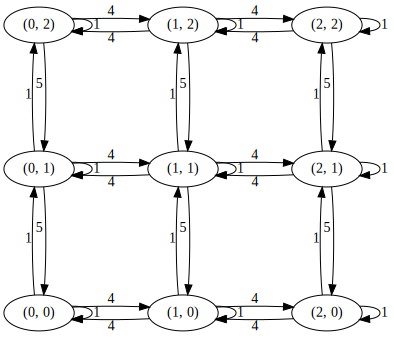

In [15]:
nw.resource_network.plot(scale=2.)

Здесь интересно обратиться вновь к нумерации вершин:

In [16]:
nw.resource_network.idx_descriptor

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

Как можно видеть, в губковых сетях вершины -- пары натуральных чисел

#### Симуляции в губковых сетях

`sn.SpongeNetwork` предоставляет специальный интерфейс для запуска симуляции

In [17]:
sim = nw.run_sponge_simulation([10, 0, 20], n_iters=10)
sim

StateArray(node_descriptor={(0, 0): 0, (0, 1): 1, (0, 2): 2, (1, 0): 3, (1, 1): 4, (1, 2): 5, (2, 0): 6, (2, 1): 7, (2, 2): 8}, idx_descriptor=[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)], states_arr=array([[ 0.        ,  0.        , 10.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , 20.        ],
       [ 0.        ,  4.5       ,  1.9       ,  0.        ,  0.        ,
         7.6       ,  0.        ,  5.        , 11.        ],
       [ 1.59090909,  1.76818182,  3.2938961 ,  0.        ,  5.08441558,
         5.83142857,  1.81818182,  6.36363636,  4.24935065],
       [ 1.4476584 ,  3.4044451 ,  2.67963248,  2.3008658 ,  5.22755664,
         3.83469511,  3.57438017,  4.33781976,  3.19294653],
       [ 2.68788565,  3.26036033,  2.19646206,  4.55396451,  4.51241111,
         3.03334694,  3.46660048,  3.95632323,  2.3326457 ],
       [ 3.73033659,  3.02167557,  1.90608978,  5.29585757,  4.21272837,
         2.39104291,  4.17646

Разница с функцией `sn.SpongeNetwork.resource_network.run_simulation` состоит в том, что здесь передаются начальные состояния только для верхних вершин, а не для всех

Для отрисовки симуляции тоже есть отдельная функция:

In [18]:
nw.plot_simulation(sim, scale=1.4)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=9), Output()), _dom_classes=('widge…

Можно обратиться к обычной функции `sn.SpongeNetwork.resource_network.run_simulation`, передав начальные данные в виде (возможно, неполного) словаря:

In [19]:
sim = nw.resource_network.run_simulation({
        (1, 1): 10,
        (2, 0): 40
    },
    n_iters=10)
nw.plot_simulation(sim, scale=1.4)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=9), Output()), _dom_classes=('widge…

#### Изменение губковых сетей

Изменить губковую сеть напрямую невозможно: это вызвало бы рассогласованность элементов объекта класса `sn.SpongeNetwork`. Для изменения предусмотрен специальный интерфейс, а именно функция `sn.SpongeNetwork.altered`. Основным параметром данной функции является функция (callback), изменяющая граф. Пример такой функции представлен ниже:

In [20]:
def callback(G: nx.DiGraph) -> nx.DiGraph:
    G.add_node((3, 1), pos=(3.2, 1.4))
    G.add_edges_from([
        ((3, 1), (2, 1), {"weight": 3}),
        ((2, 1), (3, 1), {"weight": 2})
    ])
    return G

Как можно видеть из сигнатуры данной функции, она принимает на вход граф и возвращает тоже граф. Входящий граф -- низлежащий граф исходной губковой сети, который обладает всеми теми же параметрами: вершинами, ребрами, весами, положениями и тп. Предполагается, что callback будет менять данный граф и возвращать измененную версию. В данном случае callback добавляет вершину $(3, 1)$, а также связывает ее с вершиной $(2, 1)$

Обратим внимание на то, что у вершины прописывается параметр `pos` -- координаты ее на геометрической плоскости. Этот параметр крайне важен для корректной визуализации. Если хотя бы у одной вершины в результирующем графе не будет параметра `pos`, то весь граф будет рисоваться некорректно. Кроме того, для каждого нового ребра указывается его вес. Если у какого-то ребра не будет указан вес, то он будет выставлен рандомно.

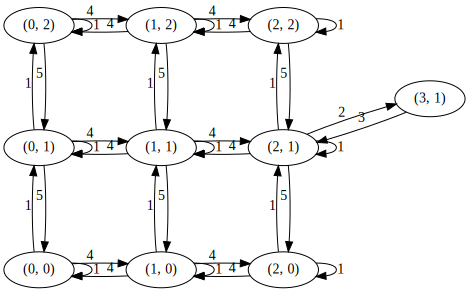

In [21]:
new_network = nw.altered(callback)
new_network.resource_network.plot()

Внимание: функция `sn.SpongeNetwork.altered` не меняет старую губковую сеть, а возвращает новую. Старая при этом остается нетронутой, ей можно пользоваться дальше

Можно также, например, убрать лишнюю вершину или ребро:

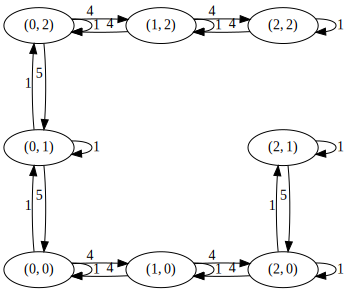

In [22]:
def callback(G: nx.DiGraph) -> nx.DiGraph:
    G.remove_node((1, 1))
    G.remove_edges_from([
        ((2, 2), (2, 1)),
        ((2, 1), (2, 2))
    ])
    return G
net_with_hole = nw.altered(callback)
net_with_hole.resource_network.plot()